In [1]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=44910bffb7dd0326fd89bff91c47199f2948a0d9442ebce1ea325005c543824a
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=00d240a914ae8630a78f99409fc1f4e3548f0e0342ee99c2216e07674941fab7
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime

In [7]:
import yfinance as yf
import pandas as pd

# Fetch Price

In [8]:
DOT1_price = yf.download(tickers='DOT1-USD', period = '2y', interval = '1d')['Adj Close']
DOT1_price.head()

[*********************100%***********************]  1 of 1 completed


Date
2020-08-20    2.900080
2020-08-21    2.875028
2020-08-22    4.484690
2020-08-23    3.967066
2020-08-24    4.602614
Name: Adj Close, dtype: float64

In [9]:
DOT1_price.tail()

Date
2021-07-09    15.669270
2021-07-10    15.290838
2021-07-11    15.482435
2021-07-12    14.873133
2021-07-14    13.792014
Name: Adj Close, dtype: float64

# Plots

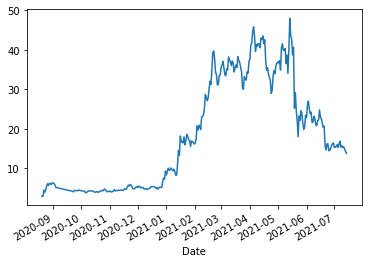

In [10]:
import matplotlib.pyplot as plt
DOT1_price.plot()
plt.show()

In [11]:
DOT1_daily_returns = DOT1_price.pct_change().dropna(axis=0)
type(DOT1_price)

pandas.core.series.Series

In [12]:
DOT1_daily_cum_returns = (DOT1_daily_returns +1).cumprod()-1
DOT1_daily_cum_returns

Date
2020-08-21   -0.008638
2020-08-22    0.546402
2020-08-23    0.367916
2020-08-24    0.587064
2020-08-25    0.904566
                ...   
2021-07-09    4.403047
2021-07-10    4.272557
2021-07-11    4.338623
2021-07-12    4.128525
2021-07-14    3.755735
Name: Adj Close, Length: 307, dtype: float64

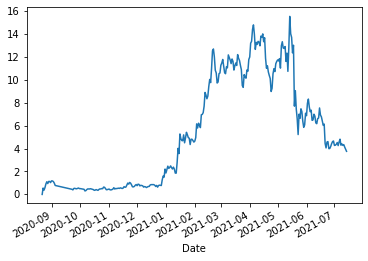

In [13]:
DOT1_daily_cum_returns.plot()
plt.show()

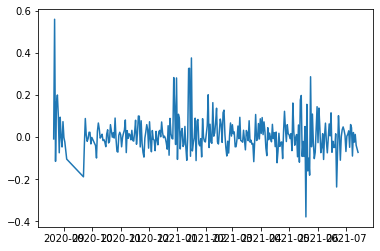

In [14]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.plot(DOT1_daily_returns)

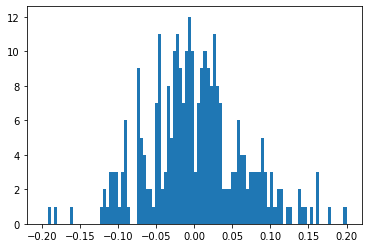

In [15]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.hist(DOT1_daily_returns,bins=100,range=(-0.2,0.2))
plt.show()

In [16]:
DOT1_price1 = yf.download(tickers='DOT1-USD', period = '4y', interval = '1d')
DOT1_price1.head()
type(DOT1_price1)

[*********************100%***********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [17]:
DOT1_daily_returns1 = DOT1_price1.pct_change().dropna(axis=0)
type(DOT1_daily_returns1)

pandas.core.frame.DataFrame

In [18]:
DOT1_daily_returns = DOT1_daily_returns1['Adj Close']
type(DOT1_daily_returns)

pandas.core.series.Series

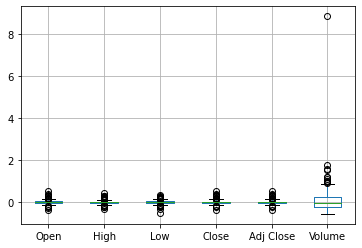

In [19]:
#fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
DOT1_daily_returns1.boxplot()#column='Adj Close')
plt.show()

# Prediction

In [20]:
pip install Prophet

     |████████████████████████████████| 65 kB 742 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.7 MB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6642803 sha256=b146425285558a9e3e1a0a2ba6f2cb47a9ac41650d2bfb2554f5915a1b984474
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [21]:
from fbprophet import Prophet
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [22]:
import datetime as dt


In [43]:
DOT1_df = yf.download(tickers='DOT1-USD', period = '2y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [37]:
modelfb = Prophet()
DOT1_df = DOT1_df.reset_index()
DOT1_df[['ds','y']] = DOT1_df[['Date','Adj Close']]
modelfb.fit(DOT1_df)


In [38]:
future = modelfb.make_future_dataframe(periods=180)

In [39]:
forecast = modelfb.predict(future)

In [40]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

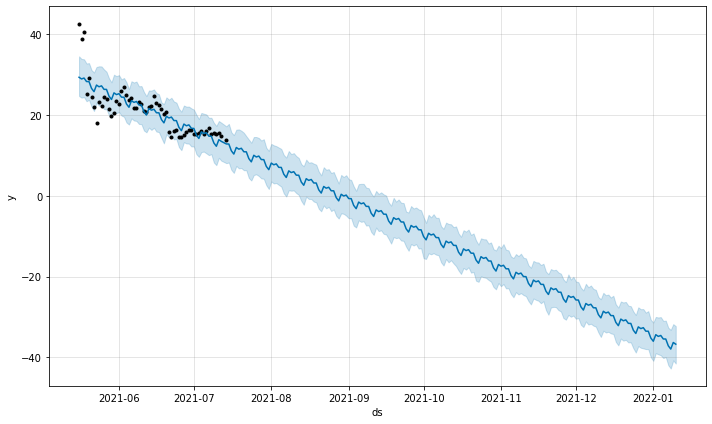

In [41]:
modelfb.plot(forecast)
plt.show()

In [42]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()